In [1]:
# # Fake News Classifier - Model Training

# Now that we have:
# - Cleaned text
# - TF-IDF features (X_train, X_test, y_train, y_test)

# We’ll:
# 1. Train baseline ML models (Logistic Regression & Naive Bayes)
# 2. Evaluate with Accuracy, Confusion Matrix, and Classification Report
# 3. Compare results


In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
X_train = np.load("./data/X_train.npy")
X_test = np.load("./data/X_test.npy")
y_train = np.load("./data/y_train.npy")
y_test = np.load("./data/y_test.npy")

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (35918, 5000)
Test Shape: (8980, 5000)


In [6]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9487750556792873


In [7]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9357461024498887


In [8]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4709
           1       0.93      0.96      0.95      4271

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4709
           1       0.93      0.93      0.93      4271

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



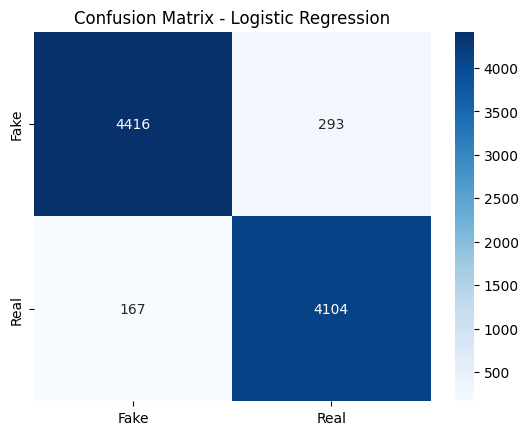

In [9]:
cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


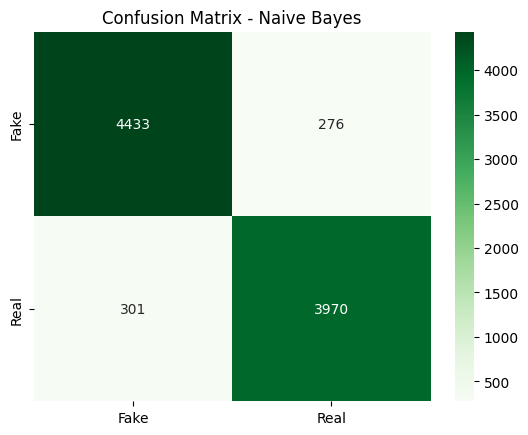

In [10]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [11]:
import joblib

# Save Logistic Regression (if it's better)
joblib.dump(log_model, "fake_news_log_model.pkl")

# Save Naive Bayes too
joblib.dump(nb_model, "fake_news_nb_model.pkl")


['fake_news_nb_model.pkl']